In [12]:
import tensorflow as tf
from tensorflow import keras

# ----- Load the MNIST dataset from TensorFlow's built-in datasets
# MNIST is a collection of 70,000 handwritten digit images (0–9) used for training and testing image classification models
mnist = tf.keras.datasets.mnist

# ----- Loaded the MNIST handwritten digits dataset.
# It automatically downloads and splits data into:
# x_train, y_train → training images and labels (60,000 samples)
# x_test, y_test   → testing images and labels (10,000 samples)
# Each image is 28x28 pixels (grayscale) and each label is a digit from 0–9.)

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# ------ Normalized the image pixel values so each image has values between 0 and 1.
# This helps the model train faster and perform better by keeping all inputs on a similar scale.
# 'axis=1' means normalization is done across each row of the image.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Initialize a Sequential model — layers will be added one after another
model = keras.Sequential([
    keras.layers.Flatten(), # Flatten layer converts 2D input (like 28x28 pixel images) into 1D array (784 values)
                            # Needed before passing image data into Dense (fully connected) layers
    keras.layers.Dense(128, activation='relu'), # First hidden layer with 128 neurons
                                                # 'Dense' means fully connected — every input connects to every neuron
                                                # 'relu' (Rectified Linear Unit) activation helps the model learn non-linear patterns efficiently
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,  activation='softmax') # Output layer with 10 neurons — one for each class (e.g., digits 0–9 in MNIST dataset)
                                                  # 'softmax' activation converts raw outputs into probabilities that sum to 1
])

                    




# Compile the model before training — this step defines how the model will learn
model.compile(
    optimizer='adam',                     # 'adam' is an adaptive optimizer that adjusts learning rate automatically for efficient training
    loss='sparse_categorical_crossentropy', # Suitable for multi-class classification when labels are integers (not one-hot encoded)
    metrics=['accuracy']                  # Tracks model performance — here, we measure how often predictions are correct
)

# Train the model on the training data
model.fit(x_train,y_train,epochs=4) #epochs=4 → The model will go through the entire training dataset 4 times to learn patterns and minimize loss.
                                   #Each epoch improves the model’s weights step by step, and the accuracy typically increases with more epochs (until overfitting occurs).



Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9236 - loss: 0.2605
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9667 - loss: 0.1064
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9777 - loss: 0.0708
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0521


In [4]:
#Next thing we are gonna do is calculate the validation loss and vaidation accuracy

# Evaluate the trained model on the test dataset
# This checks how well the model performs on data it hasn't seen before
val_loss, val_acc = model.evaluate(x_test, y_test)

# Print the test loss (error) and accuracy
# Lower loss and higher accuracy indicate better model performance
print(val_loss, val_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0902
0.09022323042154312 0.9739999771118164


In [17]:
# Save model 
model.save('my_model.keras') # Save the entire trained model (architecture + weights + optimizer state) 
                             # This allows you to reload the model later without retraining.

# Load the saved model
new_model = tf.keras.models.load_model('my_model.keras')

# --- Making predictions with the loaded model ---
# Use the reloaded model to make predictions on the test dataset.
# The model outputs probabilities for each of the 10 classes (digits 0–9 in MNIST).
predictions = new_model.predict(x_test)


print(predictions) # --- Displaying predictions ---
# Print the prediction results — each prediction is an array of 10 probabilities
# showing the likelihood of the image belonging to each digit class.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[7.0760747e-10 3.6303998e-08 2.6247992e-05 ... 9.9982089e-01
  5.1213522e-09 6.5769001e-07]
 [2.8251963e-11 6.2810238e-07 9.9999774e-01 ... 1.1672377e-11
  7.9894660e-09 1.7767595e-14]
 [6.2559756e-08 9.9986207e-01 1.0357725e-05 ... 5.4969154e-05
  5.6638553e-05 3.5178516e-07]
 ...
 [7.8311846e-09 1.7825982e-06 7.0049557e-09 ... 2.9996379e-05
  2.3488897e-07 7.8889530e-04]
 [4.3629836e-08 5.3904303e-09 7.9602049e-09 ... 3.0672663e-08
  2.0052276e-03 2.8023224e-09]
 [3.5762582e-08 9.2307843e-08 3.2806122e-07 ... 6.1067783e-11
  6.3620742e-10 7.8927719e-11]]


In [18]:
import numpy as np
print(np.argmax(predictions[1]))

2


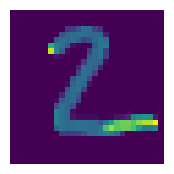

In [23]:
# Import the pyplot submodule from matplotlib for displaying images
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.imshow(x_test[1]) # Display the second test image (index 1)
plt.axis('off') # Hide the axis ticks and labels for a cleaner display
plt.show()